In [65]:
import yfinance as yf
import pandas as pd
import numpy as np
#import get_all_tickers as gat
import datetime
import pathlib
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pytz

In [19]:
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

In [20]:
s = pd.read_html(url)[0]
s = s.drop(columns=["SEC filings","CIK"],inplace=False)

In [33]:
target_location = pathlib.Path("./../").resolve() / "data" / "sp500tickers.csv"
target_location
s.to_csv(target_location,index=False,sep=";")

In [22]:
len(s)==len(s.Symbol.unique()) # Symbols are unique

True

In [24]:
# Uncomment for downloading
# end = datetime.datetime(2022,3,23,23,59,59,tzinfo=pytz.UTC)
# start = end-datetime.timedelta(days=15*365)

# test = yf.download(s.Symbol.unique().tolist(),
#                     start=start,
#                     end=end,
#                     # group_by="ticker",
#                     interval="1d")

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3780 entries, 2013-11-07 00:00:00 to 2017-02-20 00:00:00
Columns: 3030 entries, ('Adj Close', 'A') to ('Volume', 'ZTS')
dtypes: float64(3030)
memory usage: 87.4+ MB


In [29]:
test.index.min(),test.index.max()

(Timestamp('2007-03-27 00:00:00'), Timestamp('2022-03-23 00:00:00'))

In [37]:
test2 = test.copy()

In [39]:
test2.dropna(axis=1,how="all",inplace=True)

In [45]:
test2.index = pd.to_datetime(test2.index)
test2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3780 entries, 2013-11-07 to 2017-02-20
Columns: 3018 entries, ('Adj Close', 'A') to ('Volume', 'ZTS')
dtypes: float64(3018)
memory usage: 87.1 MB


In [55]:
test2.sort_index().to_pickle("./../data/sp500_history_1d_2013-11-07_to_2022-03-23.pkl")

In [56]:
def regulate_datetime_interval_temp(dataframe,freq="1D"):
    """Reindexes datetime indexed dataframe to regular intervals and adapts timezone

    Parameters
    ----------
    dataframe : pd.DataFrame
        input dataframe with DateTimeIndex as index 
    freq : str, optional
        regular interval according to https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases, by default "1min"

    Returns
    -------
    pd.DataFrame
        Output Dataframe with regular intervals in index and adjusted timezone
    """
    # returns: pandas dataframe

    # Get the first and last datetime
    first = dataframe.index.min()
    last = dataframe.index.max()
    
    # Create regular datetimes
    dt = pd.date_range(first, last, freq=freq,tz=None)
    # logging.getLogger(__name__).debug(f"New date_range : {len(dt)}")

    # Adjusts timezone
    # logging.getLogger(__name__).debug(f"tz : original is {dataframe.index.tz.zone}") 
    # logging.getLogger(__name__).debug(f"tz : new requested is {new_tz}")
    
    # try:
    #     dt = dt.tz_localize(new_tz)
    # except TypeError:
    #     dt = dt.tz_convert(new_tz)
    #     logging.getLogger(__name__).debug(f"tz : conversion from {dataframe.index.tz} to {new_tz} succeeded.")
    # except:
    #     raise
    # logging.getLogger(__name__).debug(f"tz : Final is : {dt.tzinfo}")

    newdf = dataframe.reindex(dt)
    
    return newdf

In [57]:
clean = regulate_datetime_interval_temp(test2,freq="1D")

In [51]:
clean.shape

(5476, 3018)

In [58]:
clean = clean.sort_index(inplace=False)

In [59]:
# clean.to_pickle("./../data/clean_sp500_history_1d_2013-11-07_to_2022-03-23.pkl")

In [64]:
test2.index.min(),test2.index.max()

(Timestamp('2007-03-27 00:00:00'), Timestamp('2022-03-23 00:00:00'))

<AxesSubplot:>

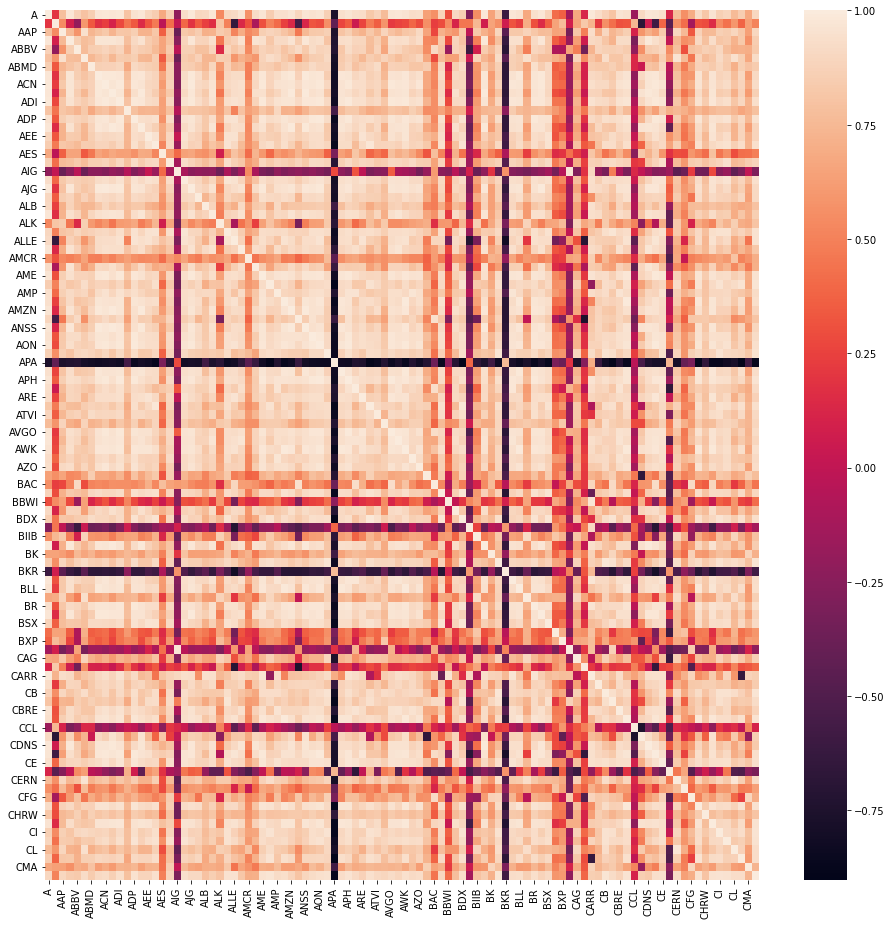

In [73]:
f, ax = plt.subplots(figsize=(16,16))
sns.heatmap(clean.Close.iloc[:,:100].corr())